# Proyek Analisis Data: <font color = 'blue'> Bike Sharing Dataset </font>
- **Nama :** <font color = 'darkgreen'> Muhammad Fatoni</font>
- **Email :** a550ybm319@devacademy.id
- **ID Dicoding:** <font color = 'darkred'>  A550YBM319 </font>

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan waktu?
- Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?
- Bagaimana dampak kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana distribusi jumlah penyewa antara pengguna kasual dan pengguna terdaftar?
- Bagaimana tren penyewaan sepeda berdasarkan jam?

## Import Semua Packages/Library yang Digunakan

In [146]:
import pandas as pd # Untuk mengolah dataframe
import numpy as np # Untuk mengolah angka
import seaborn as sns # Untuk visualisasi
import matplotlib.pyplot as plt # Untuk visualisasi

# Untuk menghilangkan pop-up warning
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
# Memnaggil dataset
df_hour = pd.read_csv('hour.csv', delimiter=',')

In [3]:
# Melihat kolom-kolom pada dataset
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**About Dataset:**
1. `instant`: Record index (a unique identifier for each row of data).

2. `dteday`: Date of the record (date of the observation).

3. `season`: The season during which the data was recorded:
- 1: Spring
- 2: Summer
- 3: Fall
- 4: Winter

4. `yr`: Year of observation:
- 0: 2011
- 1: 2012

5. `mnth`: Month of the year (1 to 12).

6. `hr`: Hour of the day (0 to 23).

7. `holiday`: Whether the day is a holiday (binary variable):
- 1: Holiday
- 0: Not a holiday

8. `weekday`: Day of the week (numeric representation from 0 to 6).

9. `workingday`: Whether the day is a working day or not (binary variable):
- 1: Working day (not a weekend or holiday)
- 0: Not a working day (weekend or holiday)

10. `weathersit`: Weather conditions on that day:
- 1: Clear, Few clouds, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

11. `temp`: Normalized temperature in Celsius. 

12. `atemp`: Normalized apparent temperature in Celsius. Calculated similarly to temp, but with different min and max values.

13. `hum`: Normalized humidity. Calculated by dividing the humidity percentage by 100.

14. `windspeed`: Normalized wind speed. 

15. `casual`: Number of casual users who rented bikes (non-registered users).

16. `registered`: Number of registered users who rented bikes (users with a membership).

17. `cnt`: Total number of bikes rented (sum of casual and registered users).

### Assessing Data

In [4]:
# Melihat 5 sample data
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7570,7571,2011-11-17,4,0,11,1,0,4,1,2,0.42,0.4242,0.82,0.1642,0,5,5
4419,4420,2011-07-08,3,0,7,1,0,5,1,1,0.72,0.6970,0.79,0.0000,9,25,34
3015,3016,2011-05-10,2,0,5,13,0,2,1,2,0.62,0.6212,0.38,0.2537,50,152,202
12130,12131,2012-05-25,2,1,5,15,0,5,1,1,0.76,0.7121,0.62,0.1940,106,360,466
6489,6490,2011-10-02,4,0,10,23,0,0,0,1,0.36,0.3636,0.81,0.0896,6,19,25


In [5]:
# Melihat informasi data
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Melihat ringkasan statistik numerik
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# Melihat jumlah nilai unik 
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [8]:
# Mengecek missing value
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Mengecek duplikasi data
df_hour.duplicated().sum()

0

**Insight:**
- Tidak Ada Missing Values dan Data Duplikat
- Format kolom `dteday` perlu diubah menjadi datetime.

### Cleaning Data

In [10]:
# Ubah format tipe data kolom dteday
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [11]:
# Mengecek format dteday apakah sudah sesuai
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Format kolom sudah sesuai

## Exploratory Data Analysis (EDA)

### Distribusi jumlah peminjaman sepeda

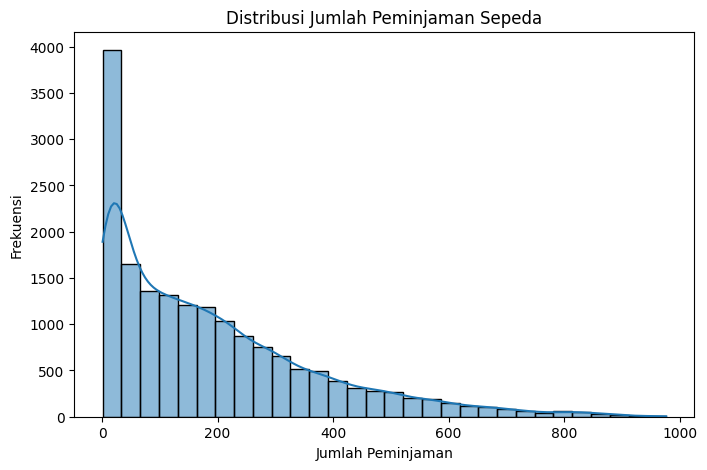

In [12]:
plt.figure(figsize=(8,5)) # Menyetel ukuran gambar
sns.histplot(df_hour["cnt"], bins=30, kde=True) # membuat visualisasi histogram

# Memberi label judul, sumbu x dan y
plt.title("Distribusi Jumlah Peminjaman Sepeda")  
plt.xlabel("Jumlah Peminjaman")  
plt.ylabel("Frekuensi")  

plt.show() # Menampilkan visualisasi

**Insight:**
- Distribusi jumlah peminjaman sepeda **positively skewed**, menunjukkan sebagian besar jam memiliki peminjaman rendah, tetapi ada beberapa jam dengan peminjaman sangat tinggi, kemungkinan dipengaruhi oleh faktor waktu atau kondisi tertentu.

### Peminjaman Sepeda Berdasarkan Musim

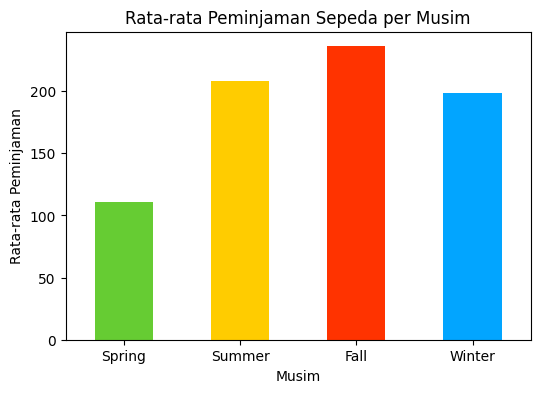

In [16]:
# Mengelompokkan data berdasarkan kolom 'season' dan menghitung rata-rata dari kolom 'cnt'
df_hour.groupby("season")["cnt"].mean().plot(kind="bar", figsize=(6,4), color=["#66cc33", "#ffcc00", "#ff3300", "#02a5ff"])

# Memberi label judul, sumbu x dan y
plt.title("Rata-rata Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")

# Mengubah label pada sumbu X agar lebih mudah dipahami
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"], rotation=0)

# Menampilkan plot
plt.show()

**Insight:**
- Peminjaman sepeda tertinggi terjadi pada musim gugur (Fall) dan terendah pada musim semi (Spring). Hal ini menunjukkan bahwa musim gugur adalah waktu yang paling diminati untuk bersepeda, sementara musim semi memiliki jumlah peminjaman paling sedikit, kemungkinan karena cuaca yang lebih basah atau kurang mendukung.

### Korelasi Antar Kolom

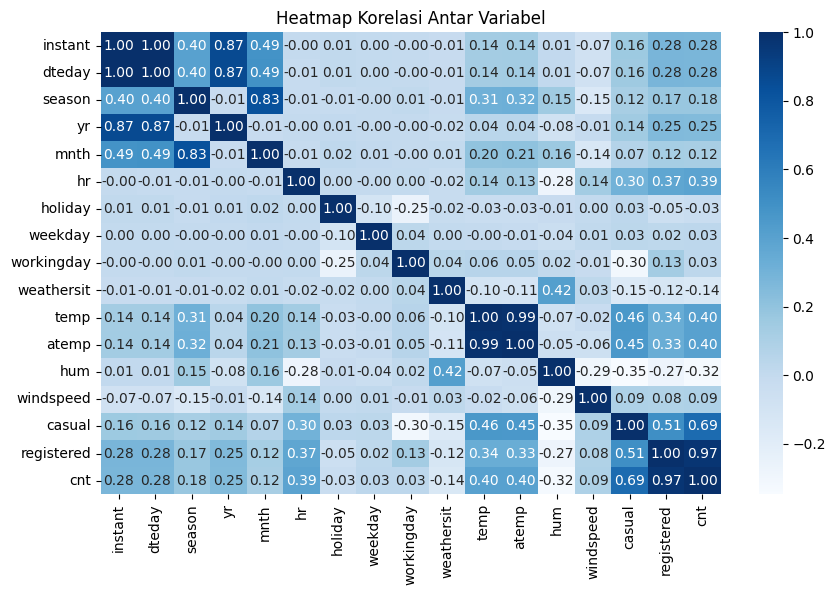

In [15]:
plt.figure(figsize=(10,6)) # menyetel ukuran plot
sns.heatmap(df_hour.corr(), annot=True, cmap="Blues", fmt=".2f") # visualisasi korelasi antar variabel
plt.title("Heatmap Korelasi Antar Variabel") # set nama judul
plt.show() # plot show

**Insight:**
- Jumlah peminjaman sepeda (`cnt`) memiliki korelasi tertinggi dengan jumlah pengguna terdaftar (registered) sebesar 0.97, menunjukkan bahwa sebagian besar peminjaman dilakukan oleh pengguna terdaftar dibandingkan pengguna kasual. Selain itu, `cnt` juga memiliki korelasi yang cukup kuat dengan suhu (`temp` dan `atemp`), menunjukkan bahwa cuaca mempengaruhi jumlah peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?

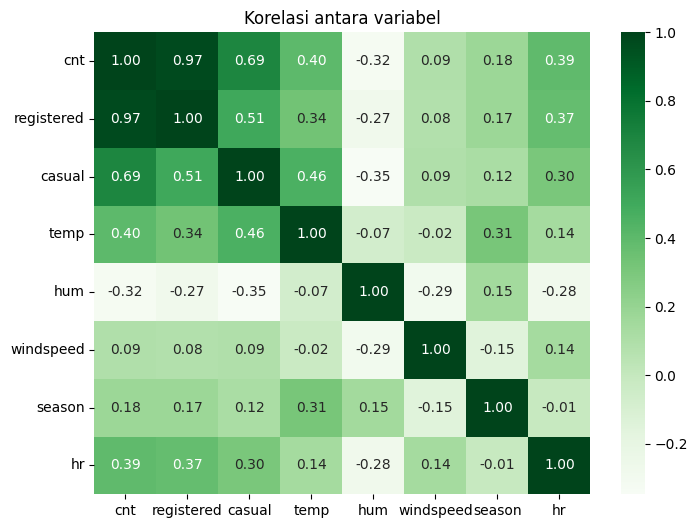

In [33]:
plt.figure(figsize=(8, 6)) # menyetel ukuran plot

# menghitung korelasi dan visualisasi plot korelasinya
corr_matrix = df_hour[['cnt', 'registered', 'casual', 'temp', 'hum', 'windspeed', 'season', 'hr']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f')

plt.title('Korelasi antara variabel') # set judul
plt.show() # plot show

**Insight:**
- Sebagian besar penyewaan sepeda berasal dari pengguna yang sudah terdaftar (`registered`) dibandingkan dengan pengguna kasual (`casual`).
- Walaupun lebih rendah dibandingkan pengguna terdaftar (`registered`), pengguna kasual (`casual`) tetap berkontribusi signifikan dalam jumlah penyewaan.
- Semakin hangat suhu, semakin banyak penyewaan sepeda. Ini menunjukkan bahwa cuaca yang nyaman mendorong lebih banyak orang untuk bersepeda.
- Saat kelembaban tinggi, jumlah penyewaan sepeda cenderung menurun. Ini mungkin karena udara yang lembab membuat bersepeda menjadi kurang nyaman.
- Kecepatan angin tidak terlalu berpengaruh signifikan terhadap jumlah penyewaan sepeda.
- Meskipun ada sedikit pengaruh, musim tidak terlalu menentukan jumlah penyewaan sepeda dibandingkan faktor lainnya seperti suhu dan kelembaban.
- Ini mengindikasikan bahwa pola waktu harian memainkan peran penting dalam penyewaan sepeda.

### Pertanyaan 2:

### Bagaimana pola penyewaan sepeda berdasarkan waktu?

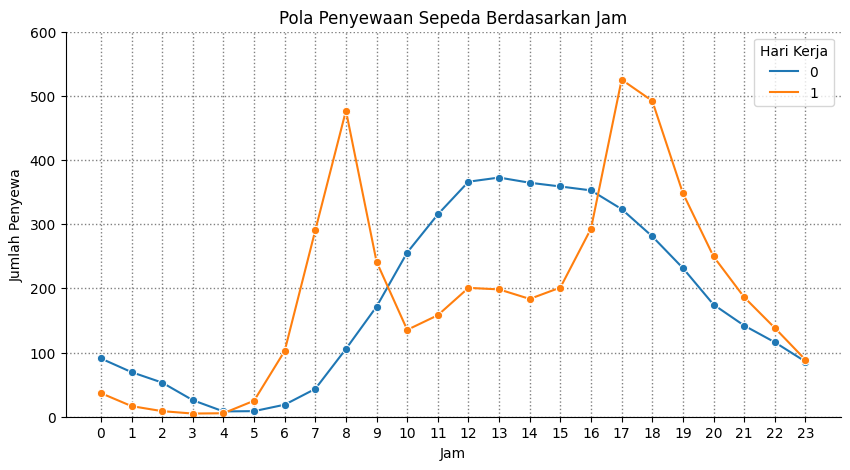

In [93]:
plt.figure(figsize=(10, 5)) # set ukuran plot

# plot lineplot jumlah penyewaan berdasarkan jam dan perbandingannya antara hari kerja dan bukan hari kerja
sns.lineplot(x='hr', y='cnt', data=df_hour, hue='workingday', ci=None, marker='o')

plt.ylim(ymin=0) # set batas min sumbu y=0
plt.xticks(range(0,24)) # set sumbu x menampilkan nilai 1 samapi 23

# set skala nilai di sumbu y
y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

# set judul dan label sumbu x dan y
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')

plt.legend(title='Hari Kerja') # menampilkan legenda

plt.grid(linestyle=':', color='gray', linewidth=1) # set garis grid

# menghapus batas / border plot di atas dan kanan
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show() # plot show

**Insight:**
- Pada hari kerja, sepeda lebih banyak digunakan untuk perjalanan ke kantor atau sekolah, sedangkan pada hari libur, pengguna cenderung bersepeda untuk aktivitas santai di siang hingga sore hari.

### **Pertanyaan 3:**

### **Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur?**

In [56]:
# Agregasi jumlah penyewaan berdasarkan hari kerja dan kategori pengguna
df_grouped = df_hour.groupby("workingday")[["registered", "casual"]].sum().reset_index()

# Ubah nilai numerik menjadi kategori (1 = Hari Kerja, 0 = Hari Libur)
df_grouped["workingday"] = df_grouped["workingday"].map({1: "Hari Kerja", 0: "Hari Libur"})

In [63]:
df_grouped

,workingday,registered,casual
0,Hari Libur,683537,316732
1,Hari Kerja,1989125,303285


In [58]:
# ubah format dataframe dari bentuk lebar ke panjang agar lebih mudah dianalisis  
df_melted = df_grouped.melt(id_vars="workingday", var_name="User Type", value_name="Total Rentals")

In [62]:
df_melted

,workingday,User Type,Total Rentals
0,Hari Libur,registered,683537
1,Hari Kerja,registered,1989125
2,Hari Libur,casual,316732
3,Hari Kerja,casual,303285


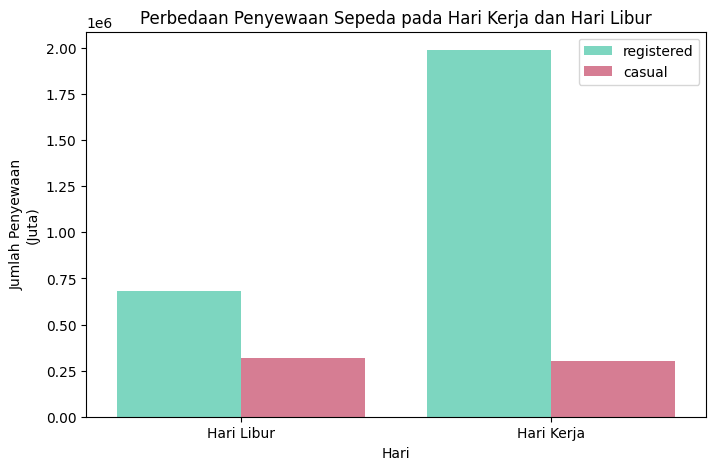

In [77]:
plt.figure(figsize=(8, 5)) # set ukuran plot

# visualisasi barplot untuk menghitung jumlah penyewaan berdasarkan hari dengan pembanding tipe cnt (registered & casual)
sns.barplot(data=df_melted, x="workingday", y="Total Rentals", hue="User Type", palette=["#6ee5c7", "#e56e8c"])

# set nama judul, sumbu x dan y
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan\n(Juta)")
plt.title("Perbedaan Penyewaan Sepeda pada Hari Kerja dan Hari Libur")

plt.legend() # menampilkan legenda
plt.show() # plot show

**Insight:**
- Penyewaan sepeda lebih tinggi pada hari kerja karena mayoritas pengguna registered menggunakan sepeda untuk keperluan transportasi harian.
- Pada hari libur, jumlah pengguna casual meningkat, menunjukkan bahwa banyak orang menggunakan sepeda untuk rekreasi atau aktivitas non-rutin.

### **Pertanyaan 4:**

### **Bagaimana dampak kondisi cuaca terhadap jumlah penyewaan sepeda?**

In [78]:
# Mengelompokkan data berdasarkan kondisi cuaca ('weathersit')  

weather_rentals = df_hour.groupby('weathersit')['cnt'].sum().reset_index()

In [81]:
weather_rentals

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


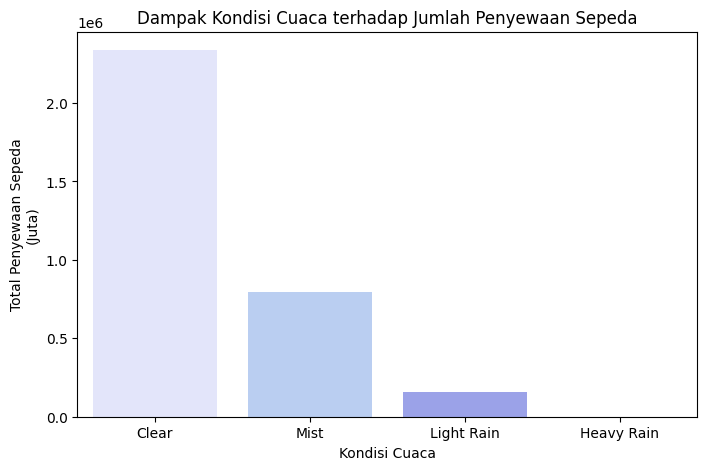

In [84]:
plt.figure(figsize=(8, 5)) #set ukuran plot

# visualisasi barplot jumlah penyewaan berdasarkan cuaca
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette=['#dfe2fe', '#b1cbfa', '#8e98f5', '#7971ea'])

# set nama judul, nam sumbu x dan y
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda\n(Juta)")
plt.title("Dampak Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda")

# set nama nilai di sumbu x
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Rain", "Heavy Rain"], rotation=0)

plt.show() # plot show

**Insight:**
- Orang lebih nyaman bersepeda ketika cuaca mendukung.

### **Pertanyaan 5:**

###  Bagaimana distribusi jumlah penyewa antara pengguna kasual dan pengguna terdaftar?

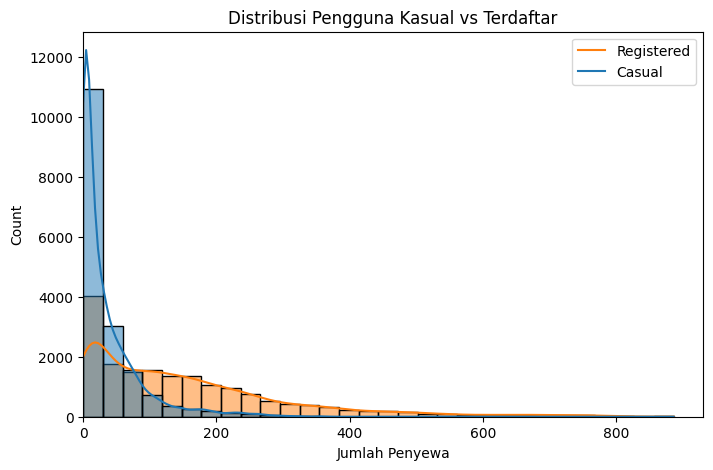

In [100]:
plt.figure(figsize=(8, 5)) # set ukuran plot

# visualisasi distribusi pengguna casual vs registered berdasarkan jumlah penyewaan
sns.histplot(df_hour[['casual', 'registered']], bins=30, kde=True)

plt.xlim(xmin=0) #set batas min sumbu x=0

# set nama judul, sumbu x dan y
plt.title('Distribusi Pengguna Kasual vs Terdaftar')
plt.xlabel('Jumlah Penyewa')

plt.legend(['Registered', 'Casual']) #menampilkan legenda
plt.show() #plot show

In [97]:
df_hour[['casual', 'registered']].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


**Insight:**
- Pengguna terdaftar (`registered`) jauh lebih dominan dalam penyewaan sepeda dibandingkan pengguna kasual (`casual`).
- Distribusi pengguna terdaftar (`registered`) lebih luas dan memiliki nilai maksimum yang lebih besar, menunjukkan bahwa mereka lebih sering menggunakan layanan.

### **Pertanyaan 6:**

### Bagaimana tren penyewaan sepeda berdasarkan jam?

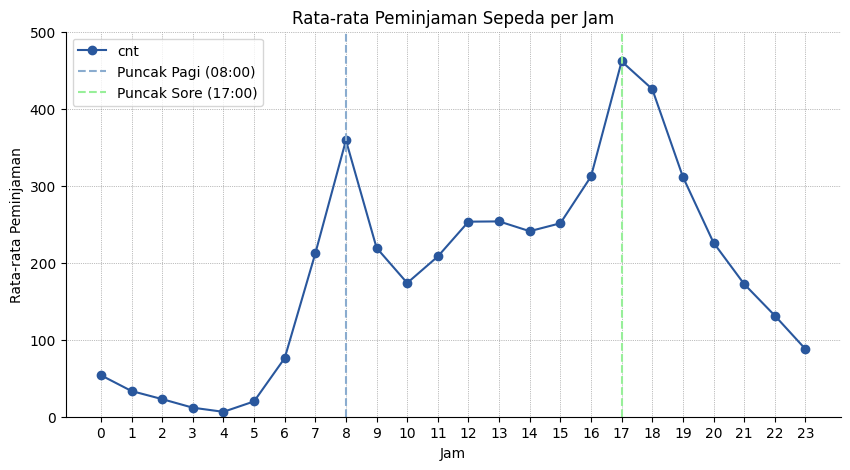

In [124]:
# Mengelompokkan data berdasarkan jam ('hr')  
# Dan menghitung rata-rata jumlah penyewaan sepeda ('cnt') untuk setiap jam 
df_hour.groupby("hr")["cnt"].mean().plot(kind="line", figsize=(10,5), marker="o", color='#29579d')

# set batas min sumbu y=0 dan menentukan nilai sumbu x - samapi 23
plt.ylim(ymin=0)
plt.xticks(range(0, 24))

# set skala di sumbu y
y_tick_label, location = plt.yticks()
plt.yticks(y_tick_label, (y_tick_label*1).astype(int))

# membuat garis vertikal di sumbu x ke 8 dan 17
plt.axvline(8, color='#8aaccf', linestyle='--', label='Puncak Pagi (08:00)')
plt.axvline(17, color='#97ef99', linestyle='--', label='Puncak Sore (17:00)')

# set nama jduul, sumbu x dan y
plt.title("Rata-rata Peminjaman Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Peminjaman")

plt.grid(linestyle=':', color='gray', linewidth=.5) # set garis grid

# menghapus garis border di atas dan kanan plot
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend() # menampilkan legenda

plt.show() # plot show

**Insight:**
- Peminjaman sepeda menunjukkan pola harian yang jelas, dengan frekuensi terendah pada dini hari (00:00 - 05:00), puncak pada jam sibuk pagi (07:00 - 08:00) dan sore (17:00 - 18:00), serta penurunan setelahnya, mencerminkan pola mobilitas kerja atau sekolah.

## Analisis Lanjutan (Opsional)

### Membuat Kategori Penyewa Berdasarkan jam

In [141]:
# Menentukan batasan kategori
bins = [0, 100, 200, df_hour['cnt'].max()]  
labels = ['Low', 'Medium', 'High'] 

# Binning jumlah ('cnt') ke dalam kategori bins
df_hour['rental_category'] = pd.cut(df_hour['cnt'], bins=bins, labels=labels, include_lowest=True)

### Clustering Berdasarkan Waktu

In [116]:
# Menentukan batasan binning
time_bins = [0, 6, 12, 18, 24]
time_labels = ['Dini Hari', 'Pagi', 'Siang', 'Malam']

# Mengelompokkan jam ('hr') ke dalam kategori waktu time_bins  
df_hour['time_category'] = pd.cut(df_hour['hr'], bins=time_bins, labels=time_labels, include_lowest=True)

### Kategori Rental yang Paling Sering Muncul Berdasarkan Time Category

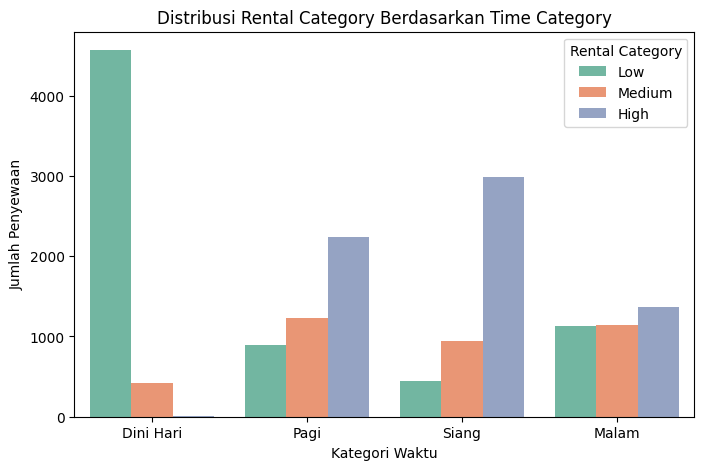

In [151]:
plt.figure(figsize=(8, 5)) #set ukuran plot

# Membuat count plot untuk melihat distribusi jumlah penyewaan sepeda berdasarkan kategori waktu  
sns.countplot(data=df_hour, x='time_category', hue='rental_category', palette='Set2')

# set nama judul, sumbu x dan y
plt.xlabel('Kategori Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.title('Distribusi Rental Category Berdasarkan Time Category')

plt.xticks(rotation=0) # set nama sumbu x sejajar 0 derajat
plt.legend(title='Rental Category') # menampilkan legenda

plt.show() #plot show

**Insight:**
- Penyewaan tertinggi terjadi di pagi dan siang hari.
- Malam hari memiliki distribusi penyewaan yang lebih seimbang.

## Kesimpulan Akhir (General Conclusion):

- Pola penyewaan sepeda dipengaruhi oleh waktu, cuaca, dan hari dalam seminggu.
- Puncak penyewaan terjadi pada pagi dan sore hari, sejalan dengan jam kerja dan sekolah.
- Pengguna terdaftar lebih banyak berkontribusi dibandingkan pengguna kasual.
- Cuaca buruk mengurangi jumlah penyewaan secara signifikan.
- Clustering membantu memahami pola penyewaan, menunjukkan bahwa malam hari memiliki distribusi yang lebih bervariasi dibandingkan pagi dan siang.
- Peminjaman sepeda tertinggi terjadi pada musim gugur (Fall) dan terendah pada musim semi (Spring). Hal ini menunjukkan bahwa musim gugur adalah waktu yang paling diminati untuk bersepeda


Secara keseluruhan, tren penyewaan sepeda mencerminkan pola aktivitas masyarakat sehari-hari, menjadikannya alternatif transportasi yang banyak digunakan saat jam sibuk.